In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return eta * (reg * Ui - Vj * (Yij - np.dot(Ui, Vj)))

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return eta * (reg * Vj - Ui * (Yij - np.dot(Ui, Vj)))


def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V.
    """
    reg_err = reg * (np.linalg.norm(U)**2 + np.linalg.norm(V)**2)
    squ_err = 0
    for row in Y:
        ii = row[0] - 1
        jj = row[1] - 1
        squ_err += (row[2] - np.dot(U[ii], V[jj])) ** 2
    return 1/2 * (reg_err + squ_err) / len(Y)

                      


def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    import time
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and K x N matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    import pdb
    U = np.random.uniform(-.5, .5, size=(M, K))
    V = np.random.uniform(-.5, .5, size=(N, K))
    err0 = get_err(U, V, Y)
    n_epochs = 0
    

    t_ep = 0
    errs = []
    while n_epochs < max_epochs:
        t_grad = 0
        t_err = 0
        n_epochs += 1
        print(n_epochs)
        start_ep=time.time()
        for row in np.random.permutation(len(Y)):
            ii = Y[row][0] - 1
            jj = Y[row][1] - 1
            Yij = Y[row][2]
            oldU = np.copy(U[ii])
            oldV = np.copy(V[jj])
            start = time.time()
            U[ii] = oldU - grad_U(oldU, Yij, oldV, reg, eta)
            V[jj] = oldV - grad_V(oldV, Yij, oldU, reg, eta)
            t_grad += time.time() - start
        st_err = time.time()
        errs.append(get_err(U, V, Y, reg))
        t_err +=  time.time() - st_err
        #pdb.set_trace()
        if n_epochs == 1:
            err0 = errs[0]/err0
        else:
            if (errs[-2] - errs[-1])/err0 < eps:
                break
        print(t_grad, t_err, time.time() - start_ep)
    return (U, V, get_err(U, V, Y, reg))
        
                                                                   

In [3]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt')	.astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
k = 20
es = 10**-np.linspace(4, 6, 3)
regs = 10**np.linspace(-1.4, -.8, 5)


eta = 0.03 # learning rate
E_ins = []
E_outs = []
'''
# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for ep in es:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s, eps = %s"%(M, N, k, eta, reg, ep))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train, eps=ep)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(es, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('Stopping')
plt.ylabel('Error')
plt.legend()
plt.savefig('ein.png')
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(es, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('Stopping')
plt.ylabel('Error')
plt.legend()
plt.savefig('2eout.png')

plt.show()
'''

'\n# Use to compute Ein and Eout\nfor reg in regs:\n    E_ins_for_lambda = []\n    E_outs_for_lambda = []\n\n    for ep in es:\n        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s, eps = %s"%(M, N, k, eta, reg, ep))\n        U,V, e_in = train_model(M, N, k, eta, reg, Y_train, eps=ep)\n        E_ins_for_lambda.append(e_in)\n        eout = get_err(U, V, Y_test)\n        E_outs_for_lambda.append(eout)\n\n    E_ins.append(E_ins_for_lambda)\n    E_outs.append(E_outs_for_lambda)\n\n\n# Plot values of E_in across k for each value of lambda\nfor i in range(len(regs)):\n    plt.plot(es, E_ins[i], label=\'$E_{in}, \\lambda=$\'+str(regs[i]))\nplt.title(\'$E_{in}$ vs. K\')\nplt.xlabel(\'Stopping\')\nplt.ylabel(\'Error\')\nplt.legend()\nplt.savefig(\'ein.png\')\nplt.clf()\n\n# Plot values of E_out across k for each value of lambda\nfor i in range(len(regs)):\n    plt.plot(es, E_outs[i], label=\'$E_{out}, \\lambda=$\'+str(regs[i]))\nplt.title(\'$E_{out}$ vs. K\')\nplt.xlabe

In [4]:
reg = 0.08
ep = 0.00001
U,V, err = train_model(M, N, k, eta, reg, Y_train, eps=ep)

1
7.888270378112793 2.7384450435638428 13.088919162750244
2
9.236000537872314 1.6697139739990234 13.789954662322998
3
8.431019306182861 2.758957624435425 13.787134170532227
4
8.799238920211792 2.035445213317871 13.588279962539673
5
8.491828918457031 1.559128999710083 12.680088520050049
6
7.984763860702515 2.1205053329467773 12.58545708656311
7
9.060493469238281 2.6468989849090576 14.56186032295227
8
8.303989887237549 3.345463752746582 14.229108333587646
9
7.538443326950073 2.523836374282837 12.388845443725586
10
9.365686416625977 3.0426528453826904 15.283932447433472
11
9.023265600204468 2.98246693611145 14.793944120407104
12
9.721382856369019 1.9769046306610107 14.742475986480713
13
9.179011821746826 1.083308219909668 13.248039484024048
14
6.654151201248169 1.7973074913024902 10.545603036880493
15
6.0323028564453125 1.8803112506866455 9.829505681991577
16
6.021419048309326 1.7983081340789795 9.700493335723877
17


In [13]:
print('Test error = ' + str(get_err(U, V, Y_test)))

Test error = 0.457730595968


In [5]:
def generate_proj(V_t):
    '''
    Finds the 2D projection of the "V" matrix.
    
    Inputs:
        V_t: the transpose of the V matrix
        
    Outputs:
        The 2D projection of the "V" matrix.
    '''
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_std=False)
    V_t_scale = scaler.fit_transform(V_t)
    V_s = V_t_scale.T
    A, S, B = np.linalg.svd(V_s)   
    A_12 = A[:,:2]
    
    return np.dot(A_12.T, V_s)

In [6]:
proj1 = generate_proj(V)

In [7]:
import pandas as pd
import pdb
from proj2_helpers import *

data = np.loadtxt('data/data.txt', dtype=int)
movies = pd.read_csv('data/movies.csv', sep=',', encoding='latin1')

get_avg_rating(movies, data)
get_num_rating(movies, data)

movies['Num'] = np.bincount(data[:,1])[1:]

# Get ids of 10 most rated movies
top_10_number_ids = (movies.sort_values('Num', ascending=False)[:10]['Movie Id'])



# Get ids of 10 most highly rated movies
top_10_ratings_ids = (movies.sort_values('Avg', ascending=False)[:10]['Movie Id'])


def get_genre_ids(movies_df, genre, n=-1):
    '''Gets the first n movie ids of the given genre
    
    Inputs:
        movies_df: pandas dataframe with movie informations, including
        title, average rating, and genre information.
        
        genre: the genre to retrieve the ids for
        
        n: the number of ids to retrieve. Sorted by number of ratings
        
    Output:
        a numpy array of integers corresponding to the id of the movies
    '''
    genre_df = movies_df[movies_df[genre]==1]
    return genre_df.sort_values('Num', ascending=False)[:n]['Movie Id']


def plot_proj(proj, movies_df, movie_ids, id_label=None, label_pts=True, suppress=False, box_color='white', size=(10, 10)):
    '''
    Plots the movies given by the ids on the 2D projection
    
    Inputs:
        proj: the 2D projection of the factorized "V" matrix. 
        
        movies_df: pandas dataframe with movie informations, including
        title, average rating, and genre information.
        
        movie_ids: numpy array of integers corresponding to the movies to plot.
        
        id_label: the label of the points in the legend. Relevant for multiple 
        datasets. (default = None)
        
        label_pts: boolean of whether to label plotted point with movie titles
        (default = True)
        
        suppress: boolean of whether to initialize and display the plot. To 
        plot multiple plots on the same figure, let suppress=True. (default = False)
        
        box_color: color of shading of the labels (default = white)
        
        size: size of the plot
        
    Outputs:
        None.
    '''
    if suppress == False:
        plt.figure(figsize=size)
    
    mask = np.zeros(len(proj[0]), dtype=bool)
    mask[movie_ids-1] = True
    
    x = proj[0][mask]
    y = proj[1][mask]
    
    plt.scatter(x, y, label=id_label)
    if label_pts == True:
        labels = [get_title_from_id(movies, movie_id) for movie_id in movie_ids]
        for label, x1, y1 in zip(labels, x, y):
            plt.annotate(
                label,
                xy=(x1, y1), xytext=(-5, 5),
                textcoords='offset points', ha='right', va='bottom'
                ,bbox=dict(boxstyle='round,pad=0.5', fc=box_color, alpha=0.2)
                #,arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
            )
    plt.axis('equal')
    if suppress == False:
        plt.show()

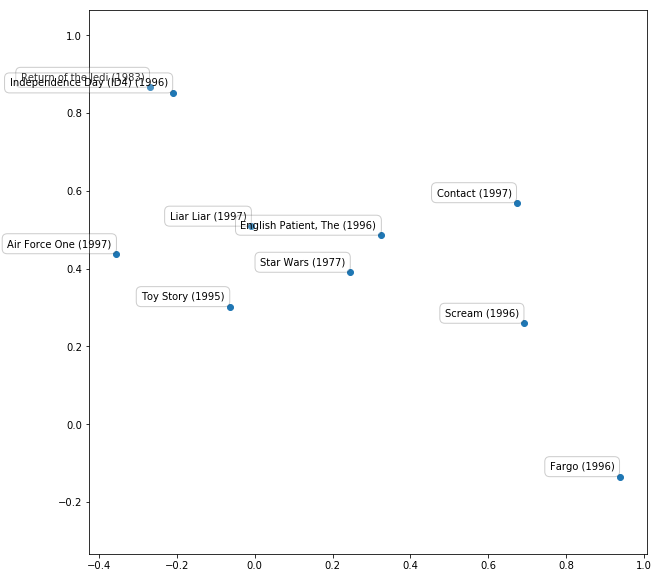

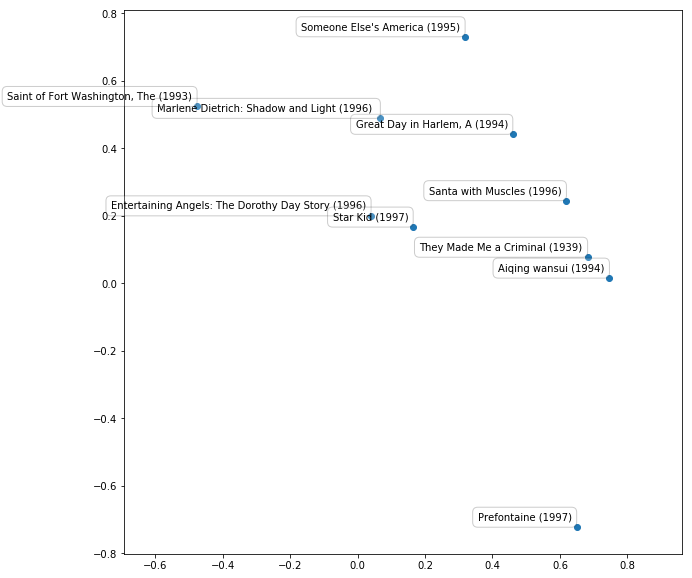

In [8]:
plot_proj(proj1, movies, top_10_number_ids, id_label='Most Rated')
plot_proj(proj1, movies, top_10_ratings_ids, id_label='Highly Rated')
#plot_proj(proj1, movies, action_ids, id_label='Action', suppress=True, box_color='green')

In [10]:
avg = np.zeros(len(movies))
count = np.zeros(len(movies))
for movie_id in movies['Movie Id']:
    inds = (data[:,1] == movie_id)
    avg[movie_id-1] = (np.mean(data[:,2][inds]))
    count[movie_id-1] = np.sum(inds)

movies['Avg'] = avg
movies['Tot'] = count

pop_movies = movies.sort_values(by='Tot', ascending=False)

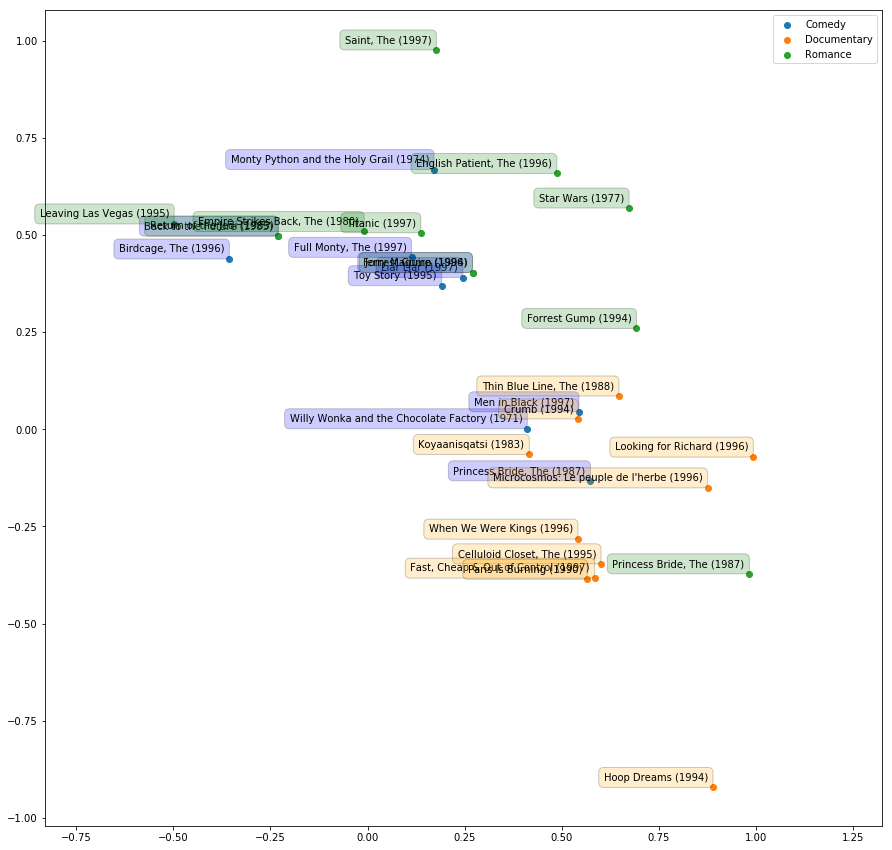

In [11]:
comedy_ids = get_genre_ids(pop_movies, 'Comedy', 10)
documentaries_ids = get_genre_ids(pop_movies, 'Documentary', 10)
romance_ids = get_genre_ids(pop_movies, 'Romance', 10)
action_ids = get_genre_ids
plt.figure(figsize=(15,15))
plot_proj(proj1, movies, comedy_ids, suppress=True, id_label='Comedy', box_color='Blue')
plot_proj(proj1, movies, documentaries_ids, suppress=True, box_color='Orange', id_label='Documentary')
plot_proj(proj1, movies, romance_ids, suppress=True, box_color='Green', id_label='Romance')
plt.legend()
plt.show()

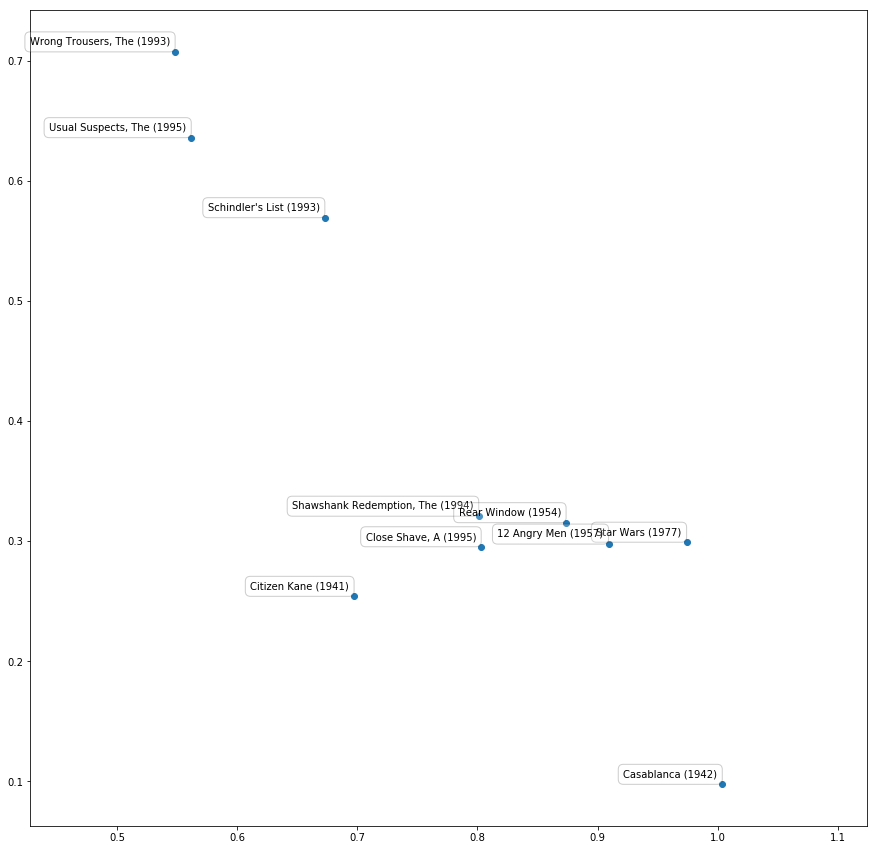

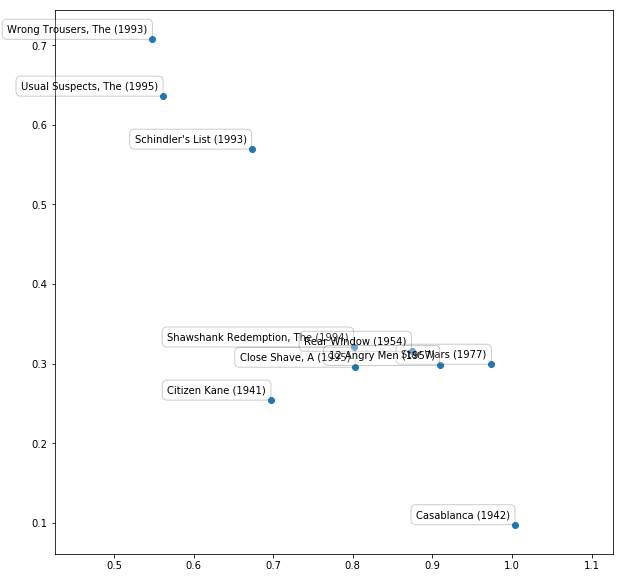

In [18]:
rate_movies = movies.sort_values(by='Avg', ascending=False)
rand_movies_ids = rate_movies[rate_movies['Tot'] > 100]['Movie Id'][:10]

plt.figure(figsize=(15,15))
plot_proj(proj1, movies, rand_movies_ids, id_label='Random', box_color='white', suppress=False)